In [ ]:
import tensorflow as tf
import numpy as np
import sys
##### sys.path.append('path to project') #####
from matplotlib import pyplot as plt
import pickle
from communication_game.utils.plot_helpers import *
from scipy.stats import ttest_ind

# mode: basic 

Sender and receiver have the same bias.

### without zero shot

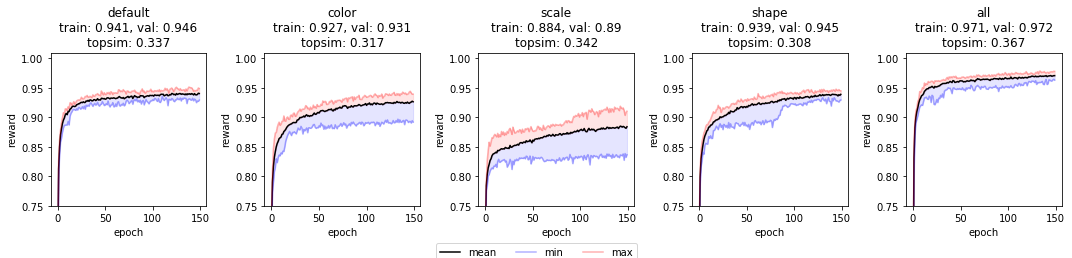

In [12]:
vs = 4
ml = 3
runs = ['default','color','scale','shape','all']
show_results_multiples(runs, vs, ml, subplots=(1,5), ylim=[0.75,1.01], n_runs=10)

In [13]:
show_accuracies(runs, vs, ml, n_runs=10)


default
train reward:  0.941 +- 0.007
val reward:  0.946 +- 0.006

color
train reward:  0.927 +- 0.012
val reward:  0.931 +- 0.014

scale
train reward:  0.884 +- 0.022
val reward:  0.89 +- 0.027

shape
train reward:  0.938 +- 0.005
val reward:  0.945 +- 0.006

all
train reward:  0.971 +- 0.004
val reward:  0.972 +- 0.005


In [14]:
show_groundedness(runs, vs, ml, n_runs=10)

groundedness
default 
posground {'color': '0.8 +-0.145', 'total': '0.618 +-0.048', 'scale': '0.133 +-0.113', 'shape': '0.067 +-0.062'} 
bosground {'total': '0.475 +-0.033', 'color': '0.9 +-0.122', 'scale': '0.075 +-0.115', 'shape': '0.025 +-0.075'}
color 
posground {'color': '0.883 +-0.113', 'shape': '0.067 +-0.097', 'total': '0.622 +-0.068', 'scale': '0.05 +-0.055'} 
bosground {'color': '0.95 +-0.1', 'total': '0.512 +-0.06', 'scale': '0.025 +-0.075', 'shape': '0.025 +-0.075'}
scale 
posground {'scale': '0.967 +-0.055', 'shape': '0.0 +-0.0', 'total': '0.703 +-0.065', 'color': '0.033 +-0.055'} 
bosground {'scale': '0.975 +-0.075', 'shape': '0.0 +-0.0', 'total': '0.544 +-0.091', 'color': '0.025 +-0.075'}
shape 
posground {'total': '0.59 +-0.028', 'color': '0.067 +-0.05', 'scale': '0.033 +-0.055', 'shape': '0.9 +-0.073'} 
bosground {'color': '0.075 +-0.115', 'scale': '0.025 +-0.075', 'shape': '0.9 +-0.122', 'total': '0.474 +-0.028'}
all 
posground {'scale': '0.111 +-0.091', 'shape': '0.38

In [15]:
show_acquisition_speed(runs, vs, ml, [0.87, 0.9, 0.93], n_runs=10)

acquisition speed
default train [ 4.4  8.  34.5]+-[ 0.917  2.28  13.567] , val [ 2.7  5.1 16.9]+-[0.64  1.3   3.113]
color train [11.6  nan  nan]+-[5.044   nan   nan] , val [ 7.5 29.3  nan]+-[ 3.612 33.891    nan]
scale train [nan nan nan]+-[nan nan nan] , val [nan nan nan]+-[nan nan nan]
shape train [ 7.6 26.8 71.2]+-[ 2.835 19.224 23.507] , val [ 5.1 16.6 44.2]+-[ 1.578 10.461 16.594]
all train [2.7 3.9 8.7]+-[0.458 0.7   1.9  ] , val [1.8 2.6 6.1]+-[0.4   0.49  1.375]


In [16]:
show_topsims(runs, vs, ml, n_runs=10)

topsims
default attribute-message 0.337+-0.034 , attribute-feature 0.439+-0.0 , feature-message 0.49+-0.064
color attribute-message 0.317+-0.031 , attribute-feature 0.437+-0.0 , feature-message 0.512+-0.073
scale attribute-message 0.342+-0.026 , attribute-feature 0.437+-0.0 , feature-message 0.574+-0.093
shape attribute-message 0.308+-0.03 , attribute-feature 0.442+-0.0 , feature-message 0.569+-0.061
all attribute-message 0.367+-0.031 , attribute-feature 0.677+-0.0 , feature-message 0.364+-0.033
Ttest_indResult(statistic=-1.9156216691493093, pvalue=0.07143720570238266)


In [17]:
show_rsas(runs, vs, ml, n_runs=10)

RSA
default , nsender-input 0.303+-0.035 , receiver-input 0.41+-0.017 , sender-receiver 0.529+-0.06
color , nsender-input 0.356+-0.041 , receiver-input 0.351+-0.02 , sender-receiver 0.589+-0.089
scale , nsender-input 0.383+-0.04 , receiver-input 0.375+-0.016 , sender-receiver 0.696+-0.122
shape , nsender-input 0.324+-0.041 , receiver-input 0.377+-0.016 , sender-receiver 0.631+-0.076
all , nsender-input 0.377+-0.044 , receiver-input 0.521+-0.023 , sender-receiver 0.507+-0.058


#### analysis statistical significance

In [28]:
ttests('default', 'all', n_runs=10)

t test results, values rounded to 5 decimals 

train reward 0.0
validation reward 0.0
speed 0.87 8e-05
speed 0.90 4e-05
speed 0.93 3e-05
topsim 0.07144
topsim extended by values from zero-shot runs 0.00018
zero-shot 0.14918
rsa sender-input 0.00086
rsa receiver-input 0.0
rsa sender-receiver 0.4374


### with zero-shot

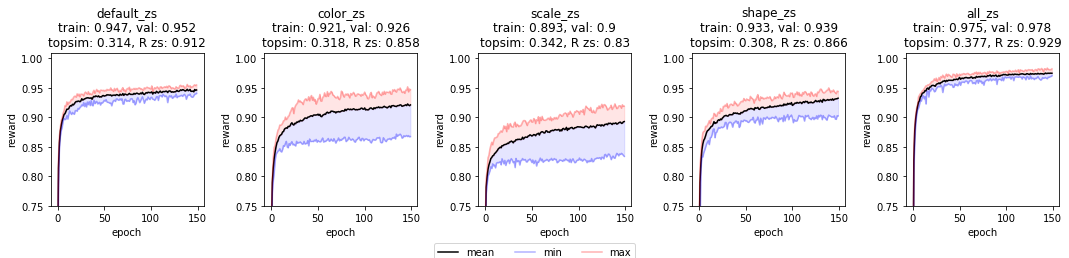

In [18]:
vs = 4
ml = 3
runs = ['default_zs', 'color_zs', 'scale_zs', 'shape_zs', 'all_zs']
show_results_multiples(runs, vs, ml, subplots=(1,5), n_runs=10, ylim=[0.75,1.01])

In [19]:
show_accuracies(runs, vs, ml, n_runs=10)


default_zs
train reward:  0.947 +- 0.005
val reward:  0.952 +- 0.005
zero shot 0.912 +- 0.024

color_zs
train reward:  0.918 +- 0.023
val reward:  0.926 +- 0.024
zero shot 0.858 +- 0.043

scale_zs
train reward:  0.894 +- 0.024
val reward:  0.9 +- 0.026
zero shot 0.83 +- 0.021

shape_zs
train reward:  0.933 +- 0.011
val reward:  0.939 +- 0.011
zero shot 0.866 +- 0.023

all_zs
train reward:  0.976 +- 0.004
val reward:  0.978 +- 0.004
zero shot 0.929 +- 0.022
Ttest_indResult(statistic=-1.506904476507161, pvalue=0.14918448687564226)


# mode: mixed

Sender and receiver have different biases

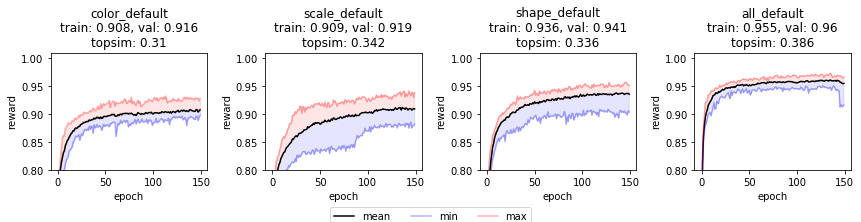

In [20]:
vs = 4
ml = 3
runs = ['color_default', 'scale_default','shape_default','all_default']
show_results_multiples(runs, vs, ml, mode='mixed', subplots=(1,5), n_runs=10, figsize=(15,3))

In [21]:
show_groundedness(['scale_default','shape_default','all_default'], vs, ml, n_runs=10, mode='mixed')

groundedness
scale_default 
posground {'scale': '0.875 +-0.119', 'total': '0.682 +-0.063', 'shape': '0.017 +-0.033', 'color': '0.108 +-0.112'} 
bosground {'scale': '0.875 +-0.168', 'total': '0.531 +-0.08', 'shape': '0.0 +-0.0', 'color': '0.125 +-0.168'}
shape_default 
posground {'color': '0.272 +-0.13', 'total': '0.627 +-0.04', 'shape': '0.703 +-0.11', 'scale': '0.025 +-0.038'} 
bosground {'total': '0.483 +-0.045', 'color': '0.208 +-0.191', 'shape': '0.792 +-0.191', 'scale': '0.0 +-0.0'}
all_default 
posground {'total': '0.642 +-0.055', 'color': '0.781 +-0.092', 'shape': '0.083 +-0.079', 'scale': '0.136 +-0.095'} 
bosground {'shape': '0.058 +-0.118', 'total': '0.466 +-0.02', 'color': '0.842 +-0.173', 'scale': '0.1 +-0.166'}


In [22]:
show_groundedness(runs, vs, ml, n_runs=10, mode='mixed')

groundedness
color_default 
posground {'total': '0.687 +-0.057', 'scale': '0.058 +-0.065', 'shape': '0.017 +-0.033', 'color': '0.925 +-0.079'} 
bosground {'total': '0.582 +-0.059', 'scale': '0.0 +-0.0', 'color': '1.0 +-0.0', 'shape': '0.0 +-0.0'}
scale_default 
posground {'scale': '0.875 +-0.119', 'total': '0.682 +-0.063', 'shape': '0.017 +-0.033', 'color': '0.108 +-0.112'} 
bosground {'scale': '0.875 +-0.168', 'total': '0.531 +-0.08', 'shape': '0.0 +-0.0', 'color': '0.125 +-0.168'}
shape_default 
posground {'color': '0.272 +-0.13', 'total': '0.627 +-0.04', 'shape': '0.703 +-0.11', 'scale': '0.025 +-0.038'} 
bosground {'total': '0.483 +-0.045', 'color': '0.208 +-0.191', 'shape': '0.792 +-0.191', 'scale': '0.0 +-0.0'}
all_default 
posground {'total': '0.642 +-0.055', 'color': '0.781 +-0.092', 'shape': '0.083 +-0.079', 'scale': '0.136 +-0.095'} 
bosground {'shape': '0.058 +-0.118', 'total': '0.466 +-0.02', 'color': '0.842 +-0.173', 'scale': '0.1 +-0.166'}


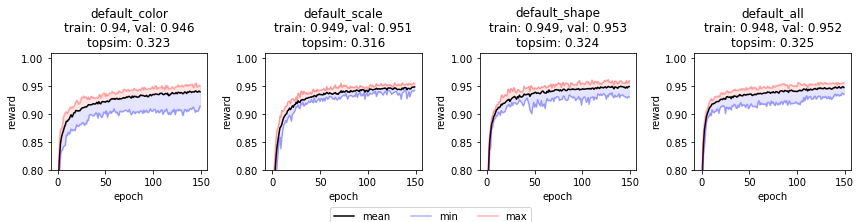

In [23]:
vs = 4
ml = 3
runs = ['default_color','default_scale','default_shape','default_all']
show_results_multiples(runs, vs, ml, mode='mixed', subplots=(1,5), n_runs=10, figsize=(15,3))

In [24]:
show_groundedness(runs, vs, ml, n_runs=10, mode='mixed')

groundedness
default_color 
posground {'total': '0.622 +-0.037', 'shape': '0.017 +-0.05', 'scale': '0.108 +-0.124', 'color': '0.875 +-0.13'} 
bosground {'total': '0.485 +-0.038', 'shape': '0.05 +-0.1', 'scale': '0.1 +-0.122', 'color': '0.85 +-0.166'}
default_scale 
posground {'color': '0.508 +-0.169', 'scale': '0.492 +-0.169', 'shape': '0.0 +-0.0', 'total': '0.598 +-0.04'} 
bosground {'color': '0.608 +-0.112', 'scale': '0.392 +-0.112', 'shape': '0.0 +-0.0', 'total': '0.438 +-0.02'}
default_shape 
posground {'total': '0.58 +-0.03', 'color': '0.706 +-0.087', 'scale': '0.05 +-0.055', 'shape': '0.244 +-0.095'} 
bosground {'total': '0.468 +-0.047', 'color': '0.775 +-0.135', 'scale': '0.025 +-0.075', 'shape': '0.2 +-0.15'}
default_all 
posground {'color': '0.783 +-0.135', 'scale': '0.133 +-0.107', 'shape': '0.083 +-0.053', 'total': '0.593 +-0.043'} 
bosground {'color': '0.875 +-0.125', 'scale': '0.125 +-0.125', 'shape': '0.0 +-0.0', 'total': '0.471 +-0.035'}
